In [1]:
from batchpy import batch as bh
import numpy as np
from matplotlib import pyplot as plt
from itertools import cycle
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [2]:
def plot_bulk(t, a, bi, s, eps):
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['mathtext.default'] = 'regular'
    cyline=cycle(['-', '--', '-.'])
    cycol = cycle(['c','crimson']) # 'bgrcmk'
    plt.style.use('seaborn-pastel')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    ax.set(xlim=(0.0, t[-1]), ylim=(0.0, 1.0))
    ax.set(xlabel=r'$\sqrt{\tau}$', ylabel='F')

    for biot in bi:
        linestyle=next(cyline)
        for alpha in a:
            color=next(cycol)
            y = 1 - bh.batch_bulk(t,biot,alpha,s,eps)
            ax.plot(np.sqrt(t), y, color=color, linestyle=linestyle)
    return

def plot_particle(t, a, bi, s, eps):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    ax.set(xlim=(0.0, t[-1]), ylim=(0.0, 1.0))
    ax.set(xlabel=r'$\sqrt{\tau}$', ylabel='F')

    for biot in bi:
        for alpha in a:
            y = bh.batch_particle_average(t,biot,alpha,s,eps)
            ax.plot(t, y)
    return


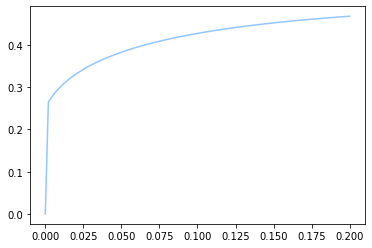

In [30]:
t = np.linspace(0, 0.2, 100)
y=bh.batch_particle_average(t,10,1,1,1e-8)
plt.plot(t,y)
plt.show()

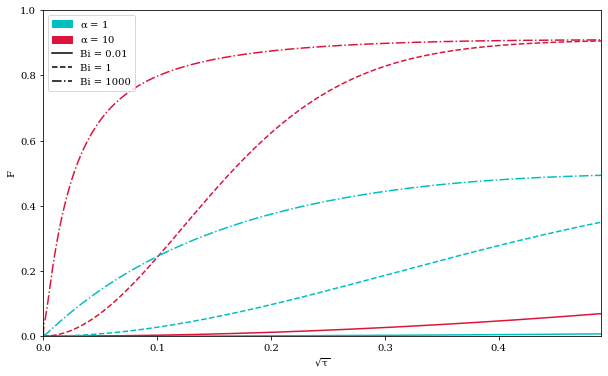

In [6]:
t = np.linspace(0, 0.7, 1000)
t = t**2
bi = [0.01, 1, 1000]
a = [1,10]
s = 2
eps = 1e-6
plot_bulk(t, a, bi, s, eps)

blue_patch = mpatches.Patch(color='c', label=r'$\alpha$ = 1')
red_patch = mpatches.Patch(color='crimson', label=r'$\alpha$ = 10')
cont_line = mlines.Line2D([], [], color='black', linestyle='-', label='Bi = 0.01')
dash_line = mlines.Line2D([], [], color='black', linestyle='--', label='Bi = 1')
dash_dot_line = mlines.Line2D([], [], color='black', linestyle='-.', label='Bi = 1000')
plt.legend(handles=[blue_patch, red_patch, cont_line, dash_line, dash_dot_line])
plt.savefig('graph1.png')
plt.show()

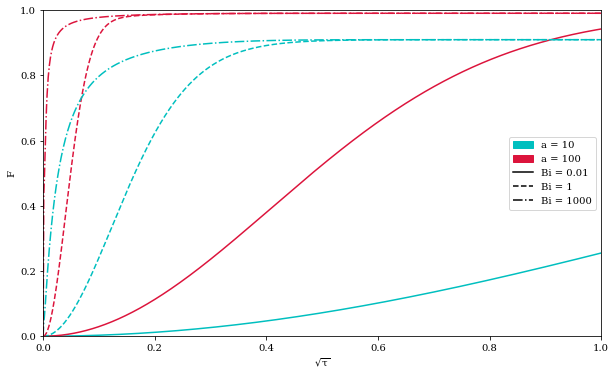

In [4]:
t = np.linspace(0, 1, 1000)
t = t**2
bi = [0.01, 1, 1000]
a = [10,100]
s = 2
eps = 1e-6
plot_bulk(t, a, bi, s, eps)

blue_patch = mpatches.Patch(color='c', label=r'$\alpha$ = 10')
red_patch = mpatches.Patch(color='crimson', label=r'$\alpha$ = 100')
cont_line = mlines.Line2D([], [], color='black', linestyle='-', label='Bi = 0.01')
dash_line = mlines.Line2D([], [], color='black', linestyle='--', label='Bi = 1')
dash_dot_line = mlines.Line2D([], [], color='black', linestyle='-.', label='Bi = 1000')
plt.legend(handles=[blue_patch, red_patch, cont_line, dash_line, dash_dot_line])
plt.show()